# Exploratory Data Analysis of Video Game Sales

## Table of Contents
- [Goals](#goals)
  - [Data Information](#data-information)
  - [Loading Data](#loading-data)
- [Data](#data)
  - [Data Review](#data-reivew)
  - [Data Cleaning](#data-cleaning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Platfrom Analysis](#platfrom-analysis)
  - [Genre Analysis](#genre-analysis)
  - [Publisher Analysis](#publisher-analysis)
  - [Region Analysis](#region-analysis)
- [Conclusion](#conclusion)


### Goals <a id="goal"></a>

This notebook contains an analysis on some Video game sales from 1980-2020. The goal for this project was to do the following:

* Get acquainted with the data this notebook
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions


### Data Information <a id="data-information"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/anandshaw2001/video-game-sales/data]


Information about this date set can be loacted from the link above. Side note that the sale are listed in millions. 


### Loading Data <a id='loading-data'></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from vgsales.csv and preview the first five rows of the DataFrame.

In [275]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import math


In [233]:
#loading dataframe
game_sales = pd.read_csv('vgsales.csv')

#viewing first 5 rows
print(game_sales.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## Data <a id="Data"></a>

### Data Information <a id='data-information'></a>

Some Immediate insights are:
* There are 11 columns and 16598 rows
* We have a mix of intergers, floats and objects (strings) listed within our data
* 271 rows have missing `NaN` values under the `Year` column. This column will need to be cleaned to replace the missing values. Since we don't know the year we will fill in the missing values with the median year. Value is stored as a float so we will update that to make the year more readable. 
* `Publisher` column is missing 58 rows so we will need to replace these values with `Unknown`
* * Some basic summary statistics on each of the numerical variables.

In [234]:
#starting by looking over some info about the dataset. 
game_sales.columns
game_sales.dtypes
game_sales.describe()
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [235]:
#checking for missing values
game_sales.isnull()

game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Data Cleaning <a id='data-cleaning'></a>

In this section we will be perfoming the following task to clean our dataset to get it ready for an EDA reivew. 

* Address the missing values in columns `Year` and `Publisher`
* Check for duplicates
* Replace `2007` to be `Unknown` in the `Publisher` column
* save clean data to new csv file. 

In [236]:
#creating a new dic for the missing values and then setting this 
#to be equal to what we want to replace and or fill in for our missing
#data.
fill_values = {
    'Year' : game_sales.Year.median(),
    'Publisher' : 'Unknown'
}

#this is a loop that is checking the columns for missing values
#counting the number of missing values for each column. 271 Year and 58 for Publisher
#after that we are going in fill in those missing values with our varibale called fill_values
#in the fill_values we already said what we wanted to have placed in there. 

for column in fill_values:
    count = game_sales[column].isnull().sum()
    game_sales.fillna(fill_values[column], inplace=True)

#changing year to a int64 from a float so the year values are stored as "2009" over "2009.0"
game_sales['Year'] = game_sales['Year'].astype(int)

In [237]:
game_sales.isnull()

game_sales.isnull().sum()

#check for any other missing values. 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [238]:
game_sales.dtypes  #rechecking tpyes after we changed the year from a float

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [239]:
#checking for any dupliactes 
print("Duplicates", game_sales.duplicated().sum())

Duplicates 0


In [240]:
#replaced '2007' with 'Unknown'
game_sales['Publisher'] = game_sales['Publisher'].replace('2007', 'Unknown')

In [241]:
game_sales.to_csv('vgsales_cleaned2.csv', index=False)
#saved to a new csv file. 

In [242]:
vg_sales_clean = pd.read_csv('vgsales_cleaned.csv')

#imported cleaned csv due to manual override needed in excel to ensure '2007' isnt listed in our Publisher column
#we will need this for visualizations

## Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

Now that the data has been cleaned the dataframe is are ready for EDA! The following independent variables will be focused on in the analysis:
* `Platform`
* `Genre`
* `Publisher`

The goal will be to see how these independent variables associate with the following dependent variables:
* `NA_Sales`
* `EU_Sales`
* `JP_Sales`
* `Other_Sales`
* `Global_Sales`

The hope is that through summary statistics and visualizations the following question can be answered:
* Which region dominates global sales?
* Which platforms drive highest sales by region?
* Do genre preferences differ by region?
* Which publishers excel in specific regions/genres?

Along the way, these questions may be refined and more questions may pop up.

In [272]:
Q1 = game_sales['Global_Sales'].quantile(0.25)
Q3 = game_sales['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
Max = game_sales['Global_Sales'].max()
Min = game_sales['Global_Sales'].min()
avg = game_sales['Global_Sales'].mean()
STD = game_sales['Global_Sales'].std()
print('Q1 = ',round(Q1 * 1000000, 2))
print('Q3 = ',round(Q3 * 1000000, 2))
print('IQR = ',round(IQR * 1000000, 2))
print('AVG = ',round(avg * 1000000, 2)) # times this by 1 million to give us a whole number and we are rounding to by 2 points. 
print('Max = ',round(Max * 1000000, 2))
print('Min = ',round(Min * 1000000, 2))
print('Q1 = ',round(Q1 * 1000000, 2))
print('STD = ', round(STD *1000000, 2))

Q1 =  60000.0
Q3 =  470000.0
IQR =  410000.0
AVG =  537440.66
Max =  82740000.0
Min =  10000.0
Q1 =  60000.0
STD =  1555027.94


### Key Takeaway

Upon initial analysis, the average global sales per game is **537,440.66 copies**. 
Given the range between the minimum (**10,000**) and maximum (**82,740,000**) values, 
outliers are present in the dataset and will be accounted for in our visualizations. 
The standard deviation of (**1,554,343.84**) further confirms the high variability in 
sales across games, indicating that while some titles sell exceptionally well, the 
majority of games sell significantly below the average.

### Region Analysis <a id="region-analysis"></a>

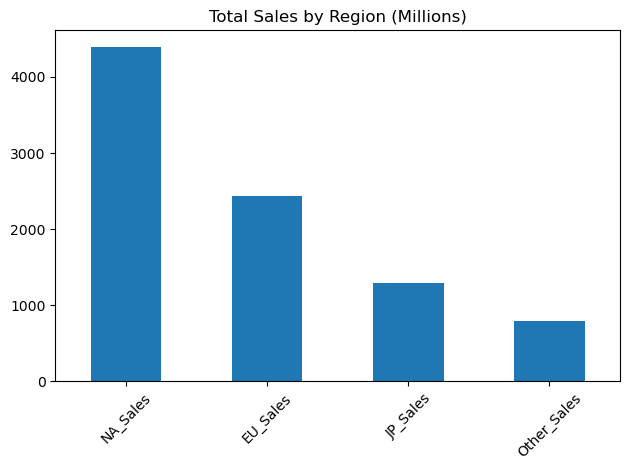

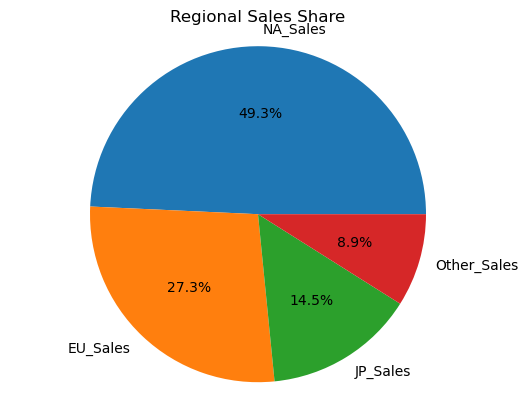

<Figure size 640x480 with 0 Axes>

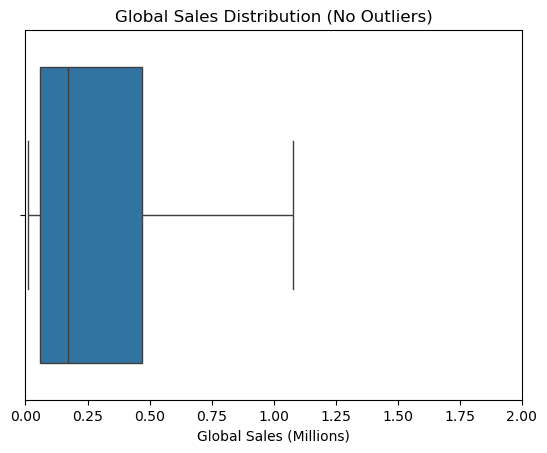

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
JP_Sales      0.449787  0.435584  1.000000     0.290186      0.611816
Other_Sales   0.634737  0.726385  0.290186     1.000000      0.748331
Global_Sales  0.941047  0.902836  0.611816     0.748331      1.000000


<Figure size 640x480 with 0 Axes>

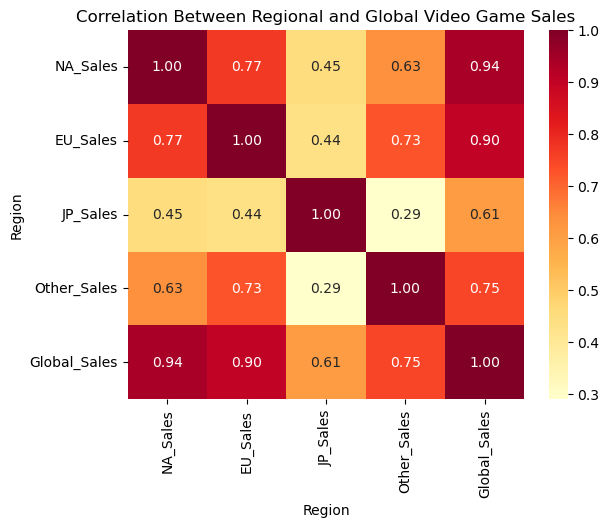

<Figure size 640x480 with 0 Axes>

In [291]:
#created a bar graph to show the domimate region
region_sales = game_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.plot(kind='bar', title="Total Sales by Region (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

#created a pie just to show another way to view this data
region_pct = game_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_pct.plot(kind='pie', autopct='%1.1f%%', title="Regional Sales Share")
plt.ylabel('')
plt.axis('equal')
plt.show()
plt.clf()

#created a box plot to showcase the global sales per million from all regions. We applied a zoom due to some outylers we wanted to avoid listing.
plt.figure()
sns.boxplot(data=game_sales, x='Global_Sales', orient='h', showfliers=False)
plt.xlim(0, 2)  # Zoom to 0-2 million sales 
plt.ylabel('')
plt.xlabel('Global Sales (Millions)')
plt.title('Global Sales Distribution (No Outliers)')
plt.show()
plt.clf()

game_sales_corr = game_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

print(game_sales_corr)

plt.clf()
plt.figure()
sns.heatmap(data=game_sales_corr, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Region')
plt.title('Correlation Between Regional and Global Video Game Sales')
plt.ylabel('Region')
plt.show()
plt.clf()

### Key Takeaway
Which region dominates global sales?

North America represents the largest market share at **49.4%** of total global sales, 
followed by Europe at **27.3%** and Japan at **14.5%**, with the remaining **8.8%** 
attributed to other regions. This highlights that nearly half of all video game sales 
are driven by the North American market, making it the most critical region for 
publishers and developers to target. However, Europe and Japan combined account for 
over **40%** of global sales, reinforcing the importance of a strong international 
presence in the video game industry.

### Platform Analysis <a id="platfrom-analysis"></a>


In [281]:
#game_sales['Platform'].nunique()
game_sales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

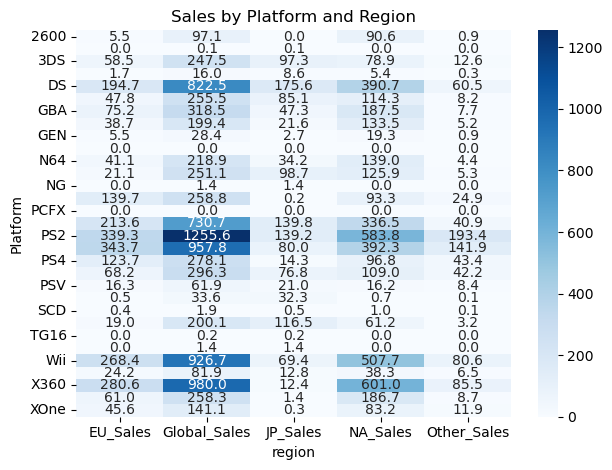

<Figure size 640x480 with 0 Axes>

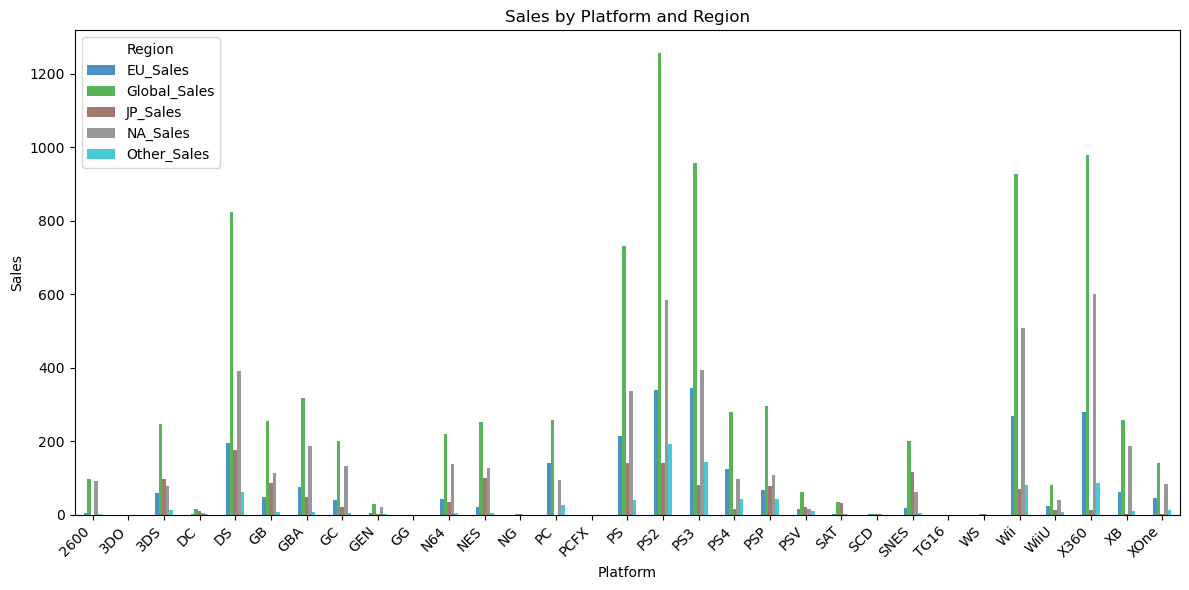

In [289]:
melted = game_sales.melt(
    id_vars='Platform',
    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
    var_name='region',
    value_name='sales'
)

crosstab = pd.crosstab(
    index=melted['Platform'],
    columns=melted['region'],
    values=melted['sales'],
    aggfunc='sum'
)

plt.clf()
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='Blues')
plt.title('Sales by Platform and Region')
plt.tight_layout()
plt.show()
plt.clf()

crosstab.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='tab10',
    alpha=0.8
)

plt.title('Sales by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Key Takeaway

Which platforms drove the highest sales by region?

The **PS2** leads all platforms with **1,255.64 million** in global sales, followed by the **X360** 
at **979.96 million** and **PS3** at **957.84 million**, making PlayStation and Xbox the dominant 
platforms of the dataset.

North America favors **Xbox and PlayStation** platforms, with the X360 generating **601.05 million** 
in NA alone. Japan shows a distinctly different preference, favoring **Nintendo and Sony handheld** 
platforms like the **DS** at **175.57 million** in JP sales and the **PSP** at **76.79 million**.

Older platforms like the **NES and SNES** have lower raw sales numbers reflective of the smaller 
gaming market at the time, however they were foundational to the industry and helped establish 
North America and Japan as the two dominant gaming markets globally.

### Genre Analysis <a id="genre-analysis"></a>


In [258]:
game_sales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

              Global_Sales
Genre                     
Action                3316
Adventure             1286
Fighting               848
Misc                  1739
Platform               886
Puzzle                 582
Racing                1249
Role-Playing          1488
Shooter               1310
Simulation             867
Sports                2346
Strategy               681


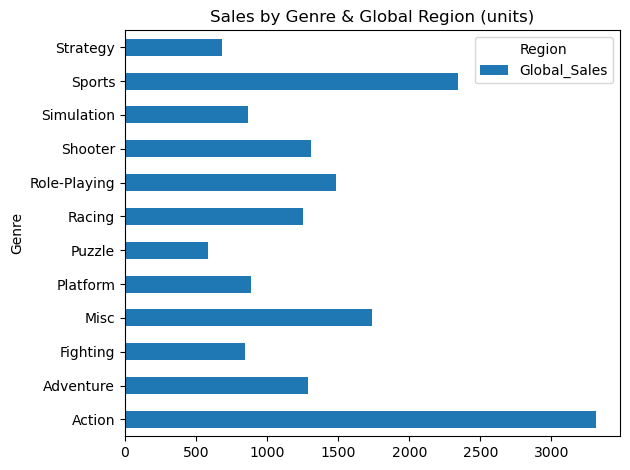

<Figure size 640x480 with 0 Axes>

In [259]:
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',\
         'Puzzle', 'Misc','Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure','Strategy']

count = []
for genre in genres:
    data = game_sales[game_sales['Genre'] == genre]['Global_Sales'].count()
    count.append(data)


pivot_global_units = pd.pivot_table(game_sales,
                              values='Global_Sales',
                              index='Genre',
                              aggfunc="count")
print(pivot_global_units)

pivot_global_units.plot(kind='barh', stacked=True)
plt.title('Sales by Genre & Global Region (units)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()
plt.clf()

              Global_Sales
Genre                     
Action             1751.18
Adventure           239.04
Fighting            448.91
Misc                809.96
Platform            831.37
Puzzle              244.95
Racing              732.04
Role-Playing        927.37
Shooter            1037.37
Simulation          392.20
Sports             1330.93
Strategy            175.12


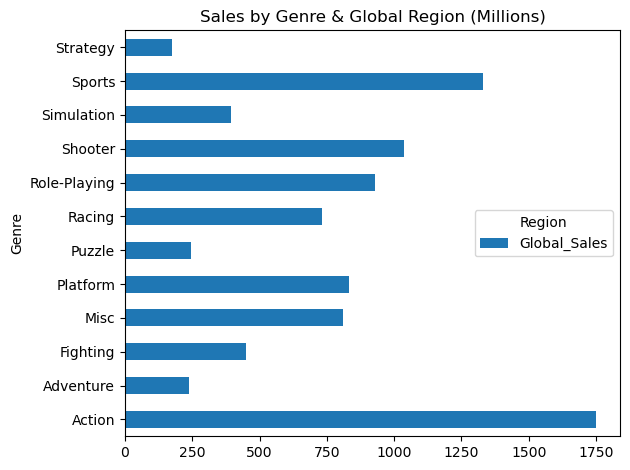

<Figure size 640x480 with 0 Axes>

In [260]:
game_sales['Genre'].unique()
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',\
         'Puzzle', 'Misc','Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure','Strategy']

count = []
for genre in genres:
    data = game_sales[game_sales['Genre'] == genre]['Global_Sales'].sum()
    count.append(data)
    

pivot_global_sales = pd.pivot_table(game_sales,
                              values='Global_Sales',
                              index='Genre',
                              aggfunc="sum")
print(pivot_global_sales)

pivot_global_sales.plot(kind='barh', stacked=True)
plt.title('Sales by Genre & Global Region (Millions)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()
plt.clf()

In [270]:
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing',\
         'Puzzle', 'Misc','Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure','Strategy']
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

count = []
for genre in genres:
    for region in regions:
        data = game_sales[game_sales['Genre'] == genre][region].sum()
        count.append(data)
        


pivot_region_sales = pd.pivot_table(game_sales,
                       values=regions,
                       index='Genre',
                       aggfunc="sum")

print(pivot_region_sales)
#pivot_region_sales.head()

              EU_Sales  JP_Sales  NA_Sales  Other_Sales
Genre                                                  
Action          525.00    159.95    877.83       187.38
Adventure        64.13     52.07    105.80        16.81
Fighting        101.32     87.35    223.59        36.68
Misc            215.98    107.76    410.24        75.32
Platform        201.63    130.77    447.05        51.59
Puzzle           50.78     57.31    123.78        12.55
Racing          238.39     56.69    359.42        77.27
Role-Playing    188.06    352.31    327.28        59.61
Shooter         313.27     38.28    582.60       102.69
Simulation      113.38     63.70    183.31        31.52
Sports          376.85    135.37    683.35       134.97
Strategy         45.34     49.46     68.70        11.36


<Figure size 640x480 with 0 Axes>

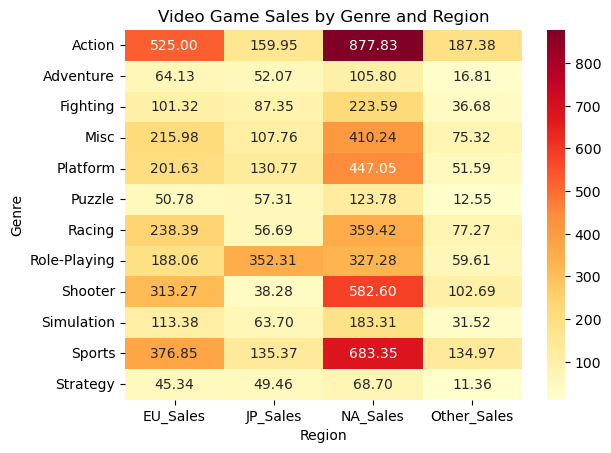

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

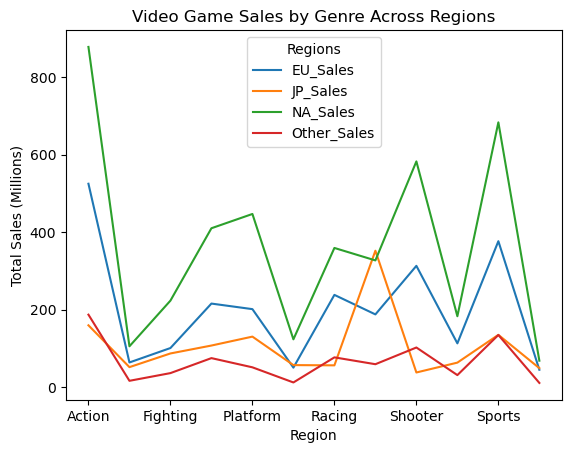

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

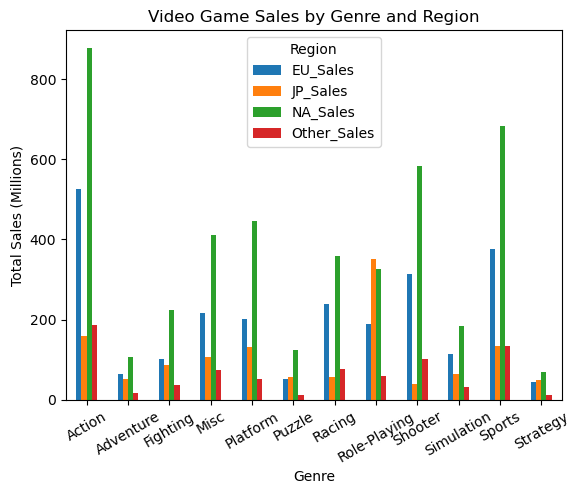

<function matplotlib.pyplot.clf() -> 'None'>

In [268]:
#heatmap / line graph to show the sales per gerne

#all regions
plt.clf()
plt.figure()
sns.heatmap(data=pivot_region_sales, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Video Game Sales by Genre and Region')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()
plt.clf()

plt.figure()
pivot_region_sales.plot()
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.title('Video Game Sales by Genre Across Regions')
plt.legend(title='Regions')
plt.show()
plt.clf()

plt.figure()
pivot_region_sales.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.title('Video Game Sales by Genre and Region')
plt.legend(title='Region')
plt.xticks(rotation=30)
plt.show()
plt.clf


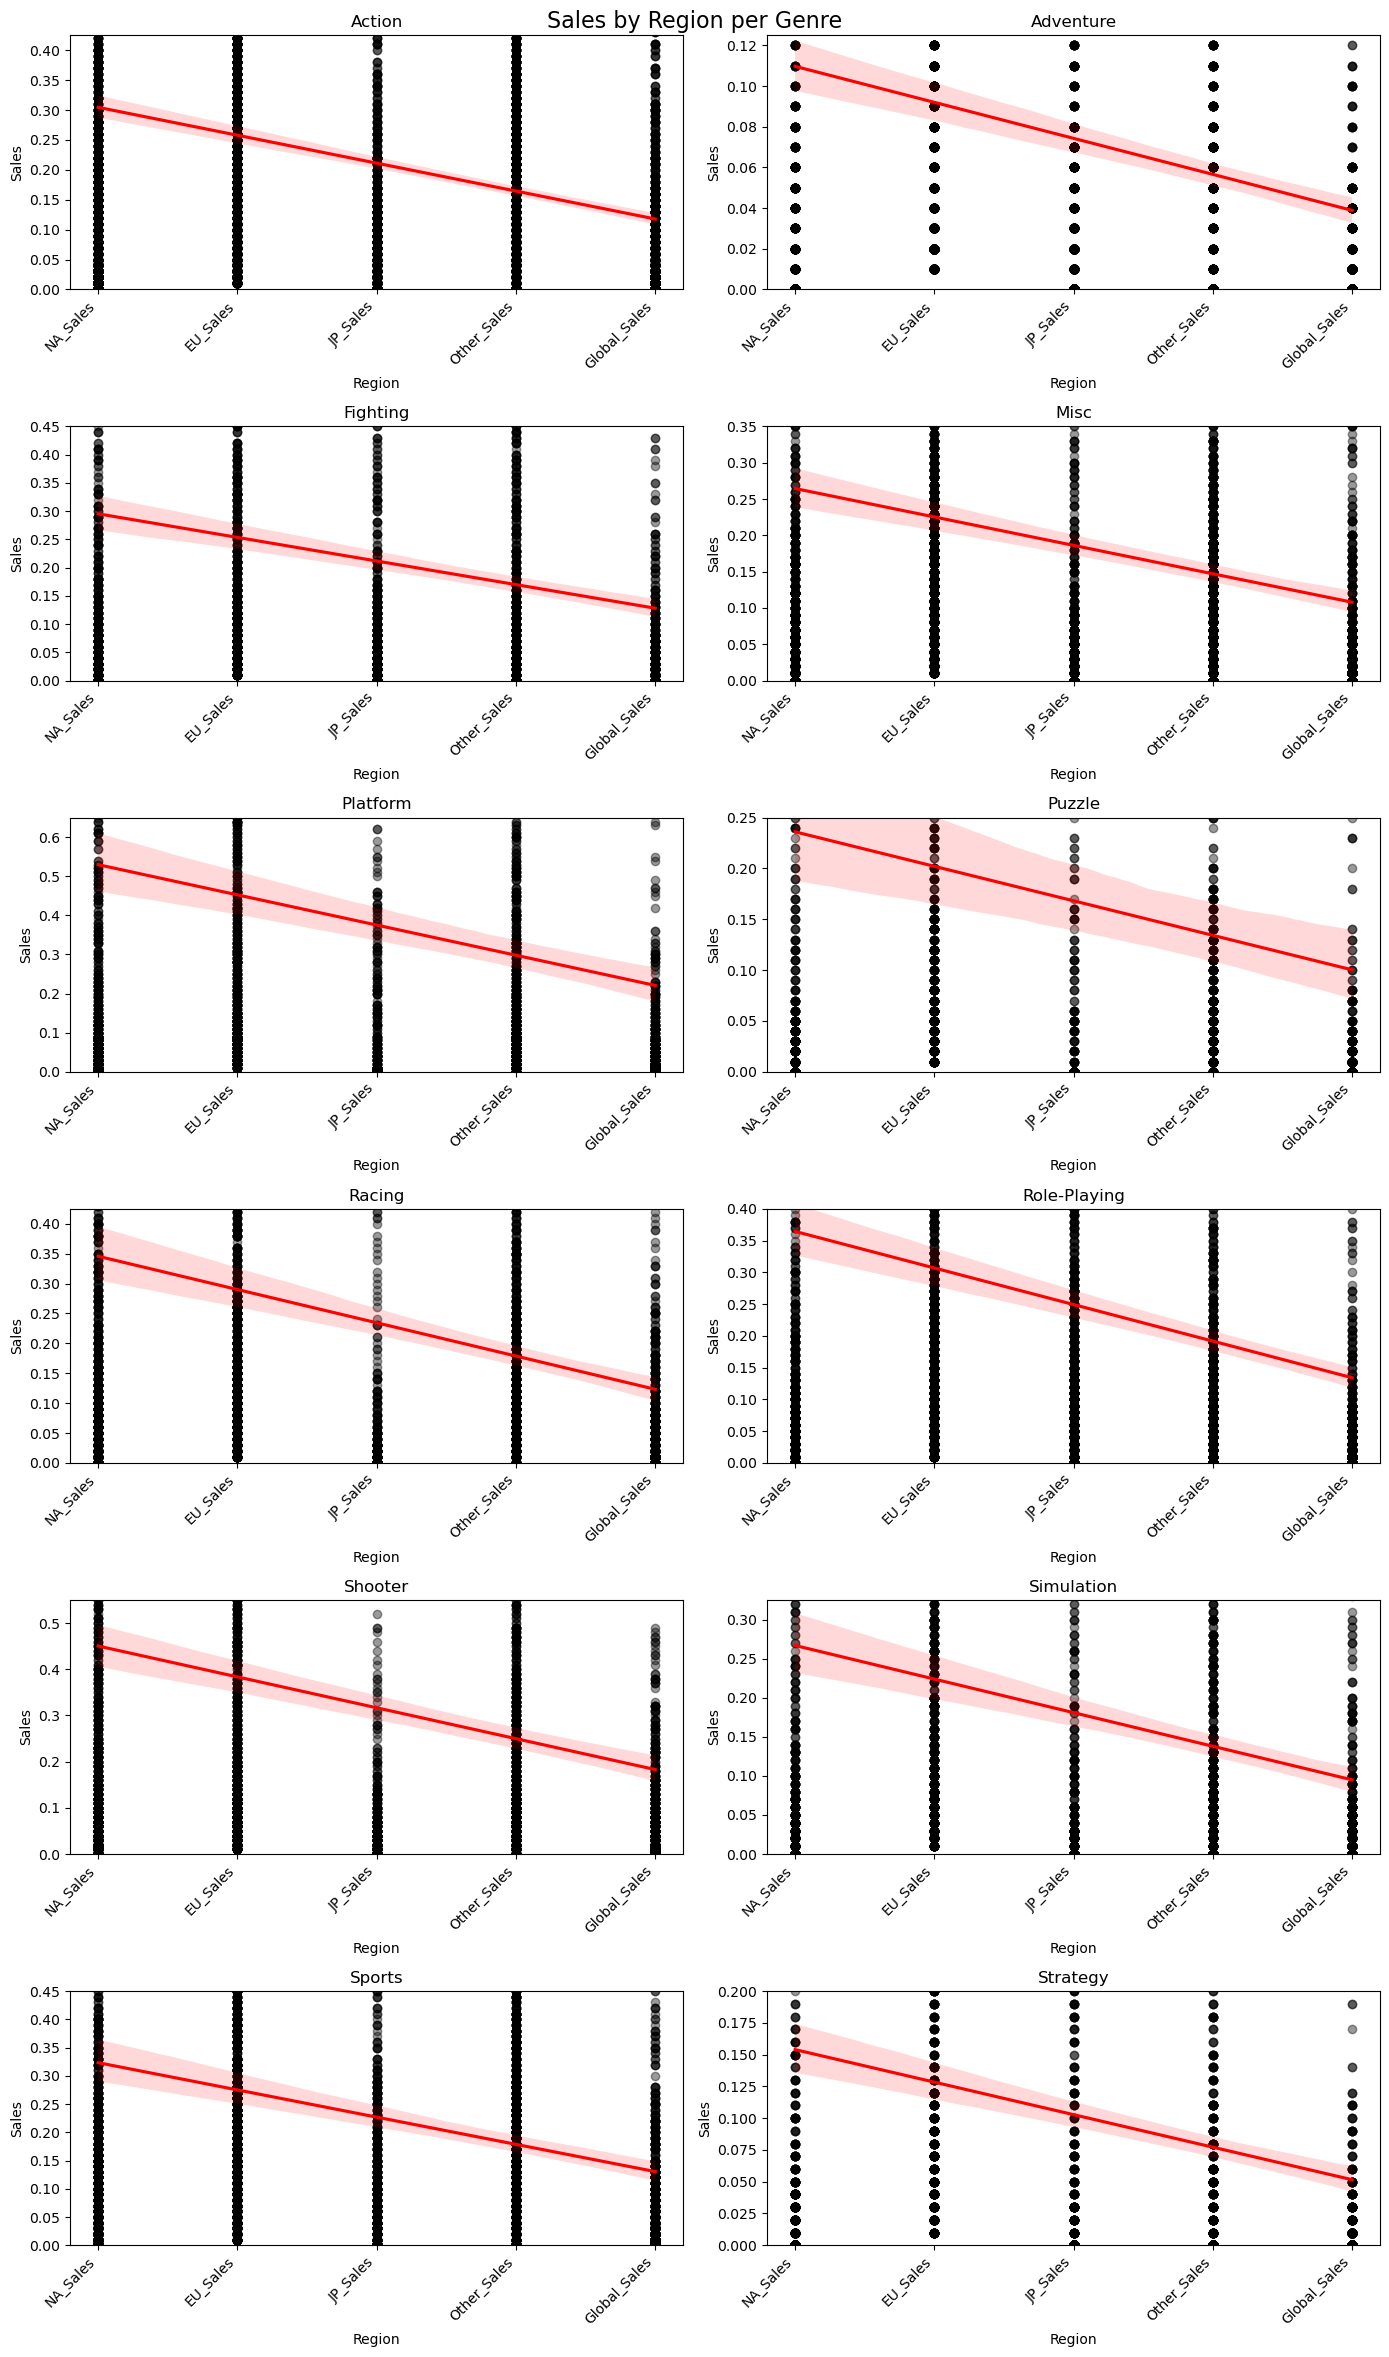

In [297]:
genres = sorted(game_sales['Genre'].unique())
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

cols = 2
rows = math.ceil(len(genres) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = game_sales[game_sales['Genre'] == genre].melt(
        value_vars=region_cols,
        var_name='region',
        value_name='sales'
    )

    # IQR cap per genre
    Q1 = genre_data['sales'].quantile(0.25)
    Q3 = genre_data['sales'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR

    sns.regplot(
        x=genre_data['region'].astype('category').cat.codes,
        y=genre_data['sales'],
        scatter_kws={"color": "black", "alpha": 0.4},
        line_kws={"color": "red"},
        ax=ax
    )

    ax.set_ylim(0, upper_limit)
    ax.set_xticks(range(len(region_cols)))
    ax.set_xticklabels(region_cols, rotation=45, ha='right')
    ax.set_title(genre)
    ax.set_xlabel('Region')
    ax.set_ylabel('Sales')

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Sales by Region per Genre', fontsize=16)
plt.tight_layout()
plt.show()

### Do Genre Preferences Differ by Region?

Genre preferences do differ by region. North America dominates in overall sales across nearly every genre, with **Action** leading at **877.83 million**, followed by **Shooter** at **582.60 million** and **Sports** at **683.35 million**, suggesting that North American consumers favor fast paced and competitive genres.

Europe follows a similar pattern to North America, with **Action**, **Sports**, and **Shooter** being the top performing genres, however at a significantly lower volume.

Japan stands out as the most distinct market. While Action and Sports lead in every other region, Japan shows a strong preference for **Role-Playing** games at **352.31 million**, which is the highest performing genre in that region by a significant margin. This suggests that Japanese consumers have a unique preference for story driven gameplay compared to other regions.

Other regions follow a similar trend to North America and Europe with **Action** and **Sports** leading, though at much lower volumes overall.

### Key Takeaway
While Action tends to perform well globally, regional differences are evident — particularly in Japan where Role-Playing games dominate, highlighting the importance of considering regional preferences when analyzing video game sales data.

### Publisher Analysis <a id="publisher-analysis"></a>

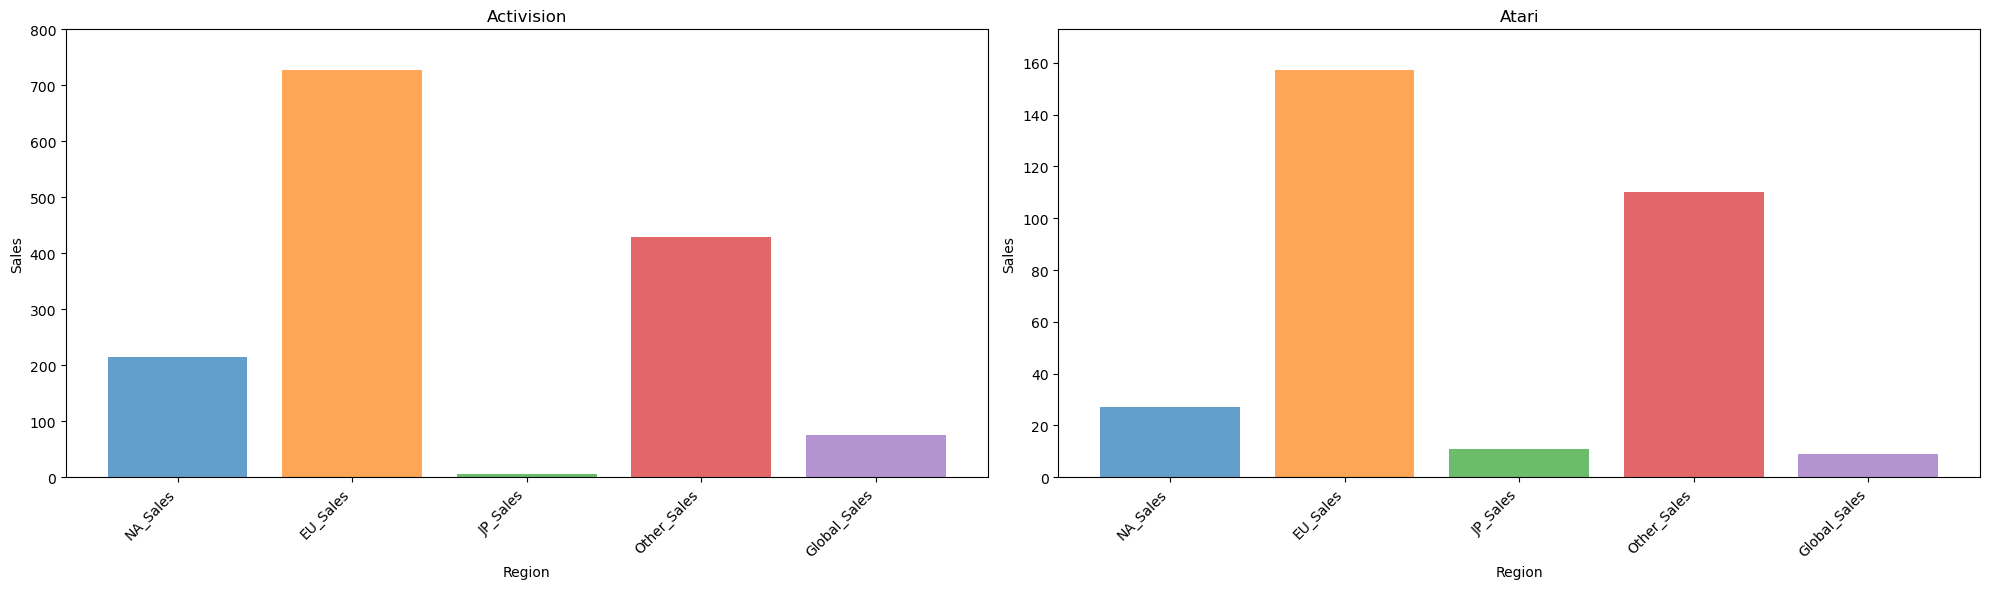

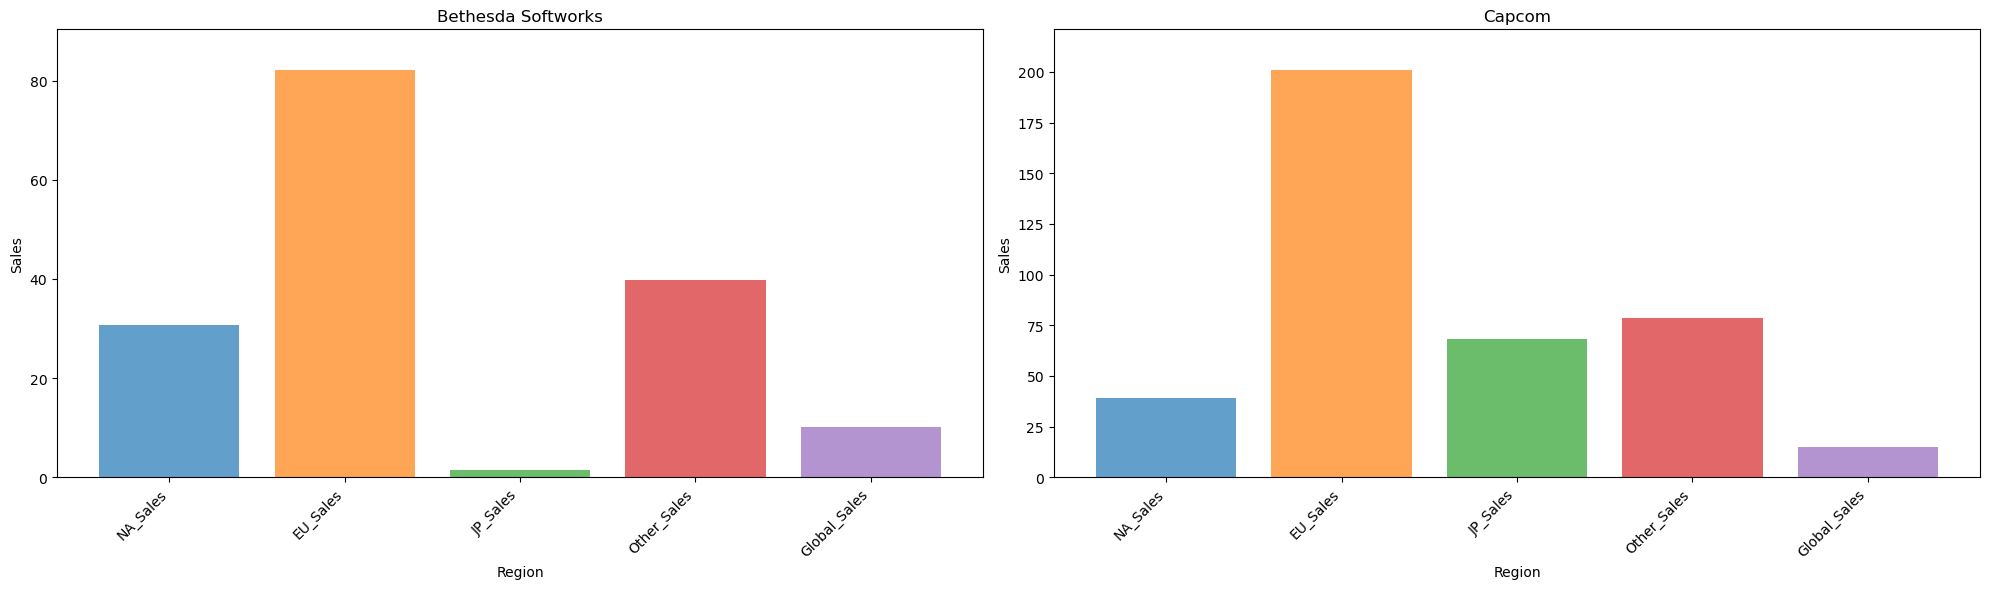

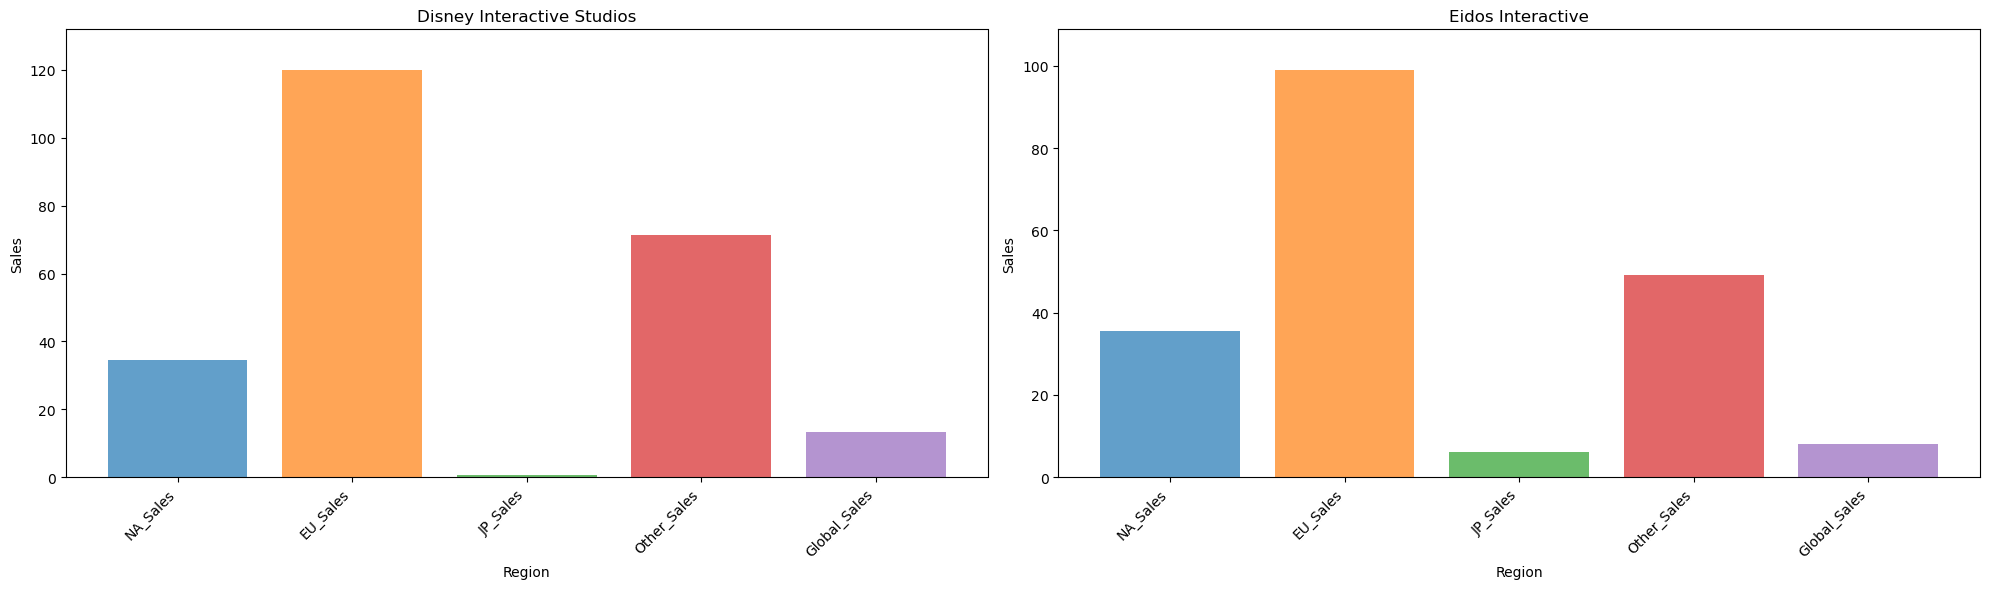

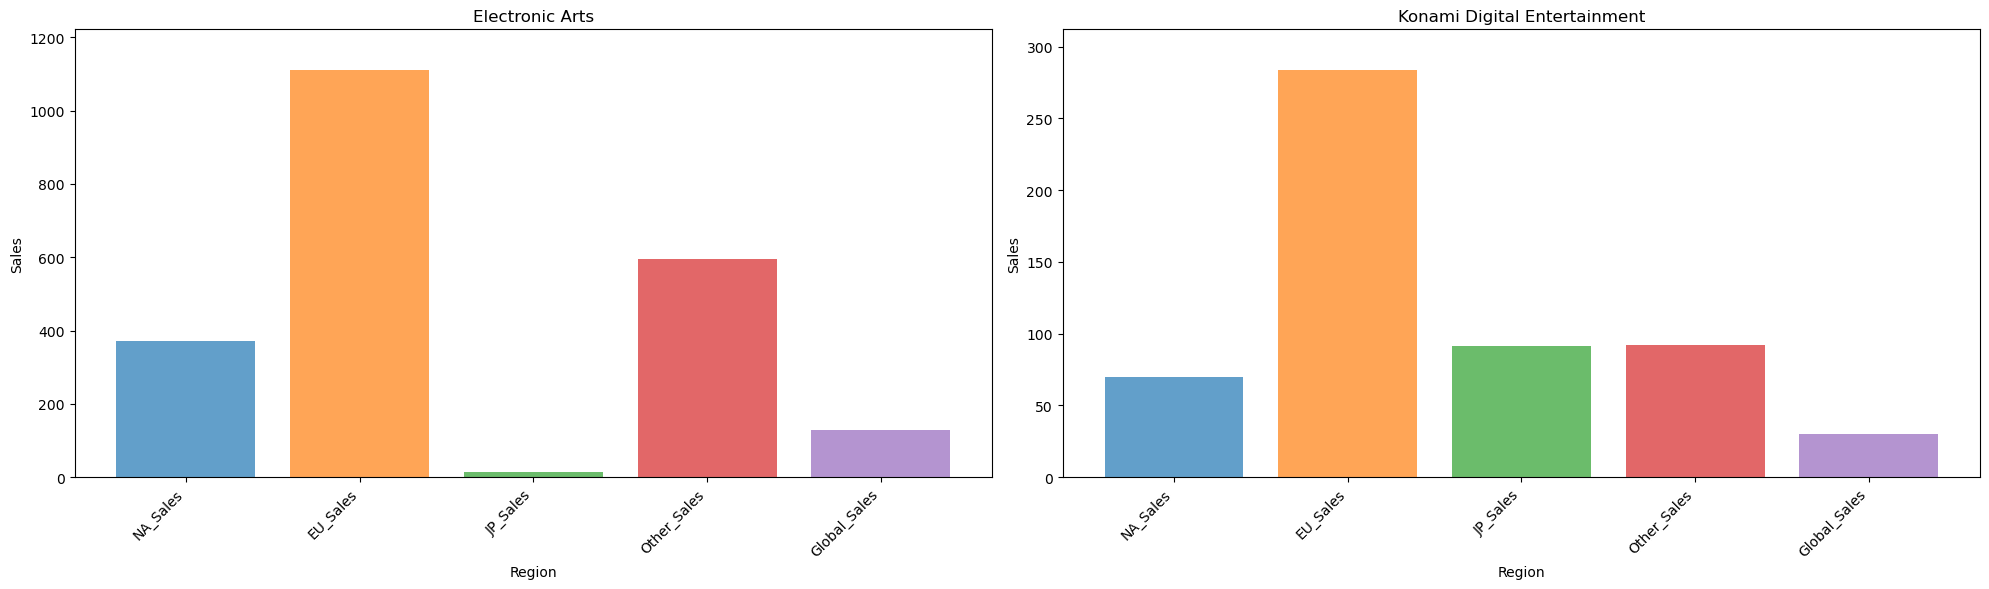

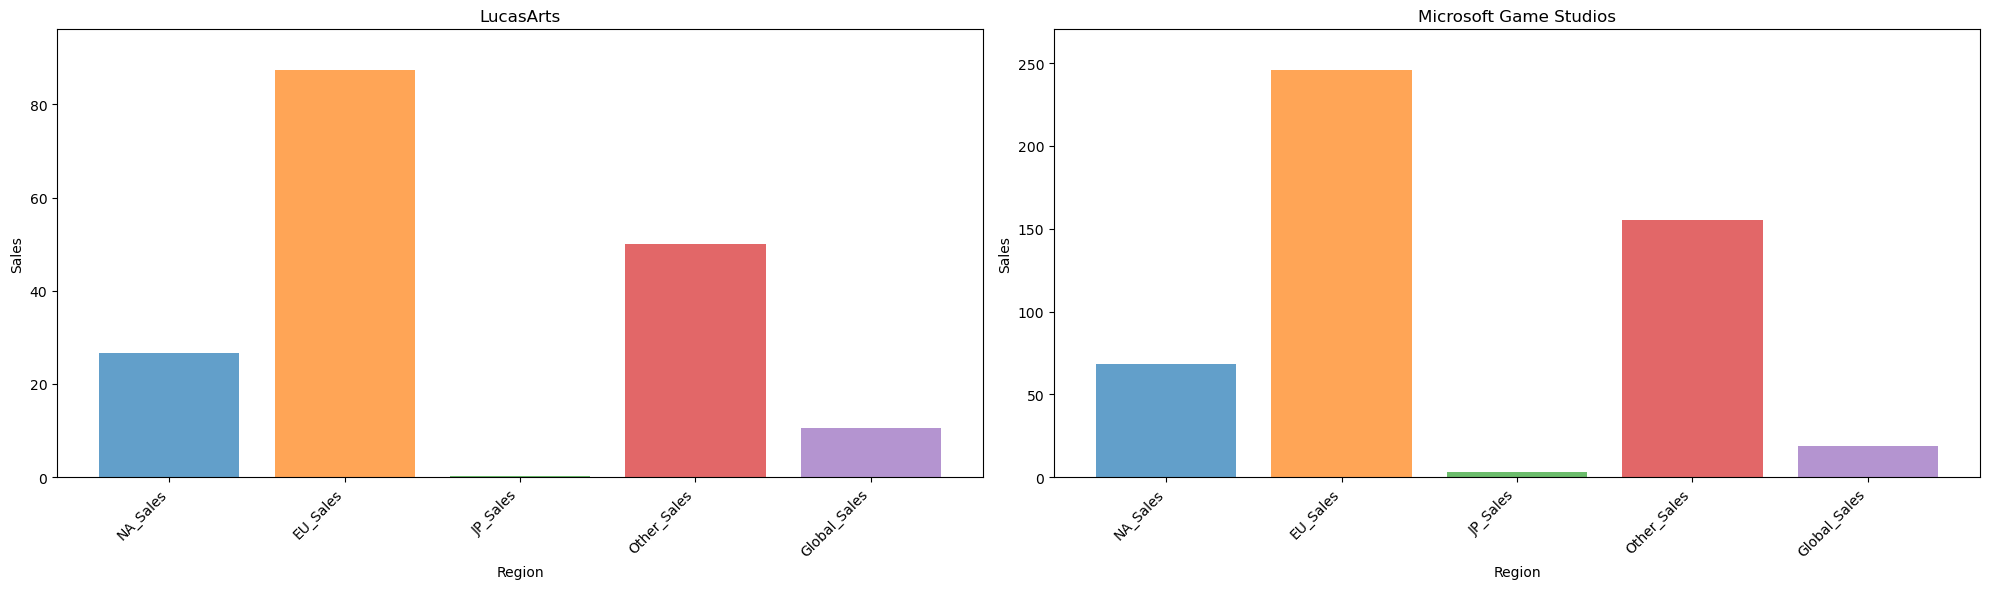

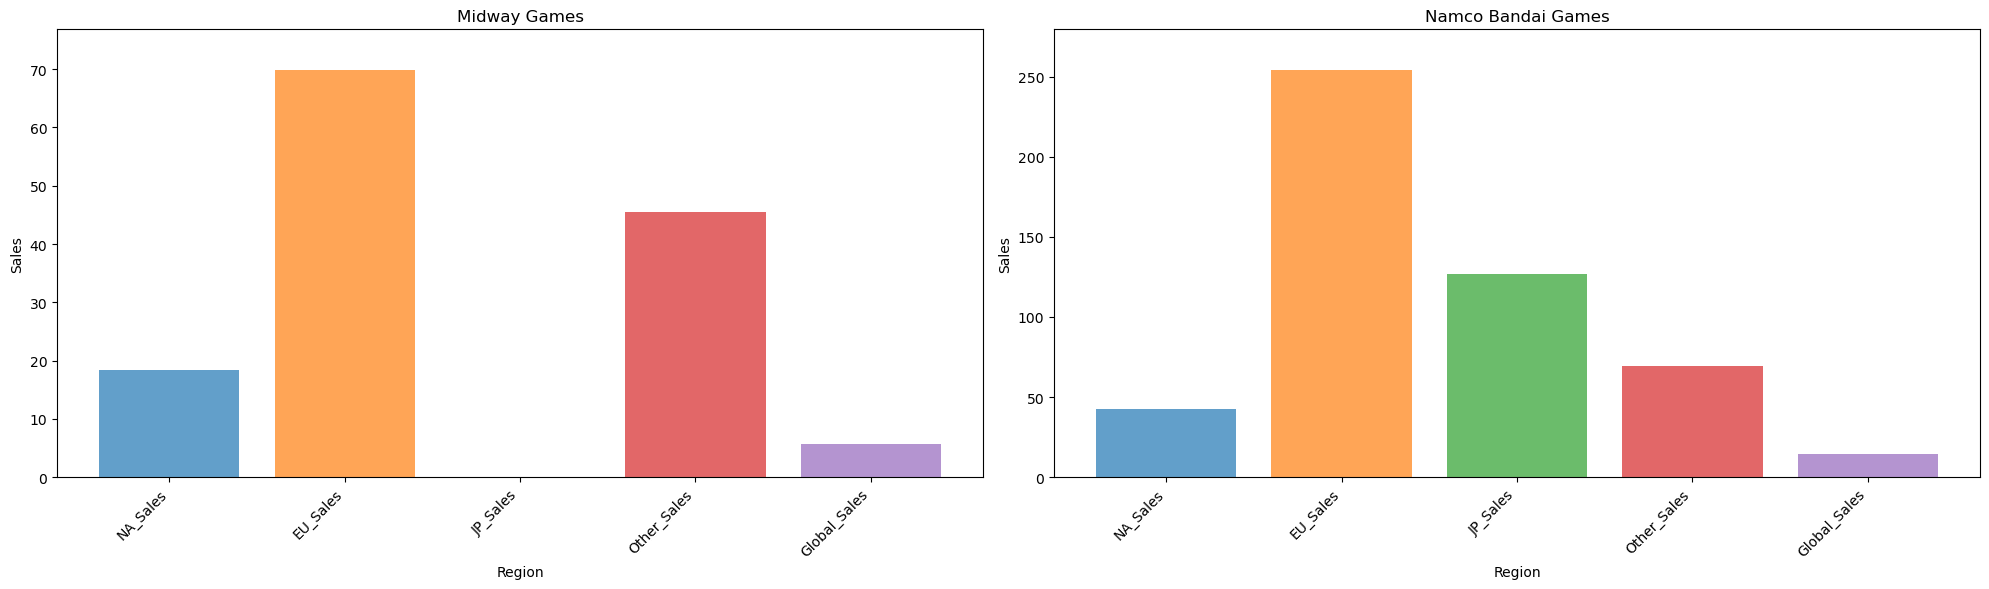

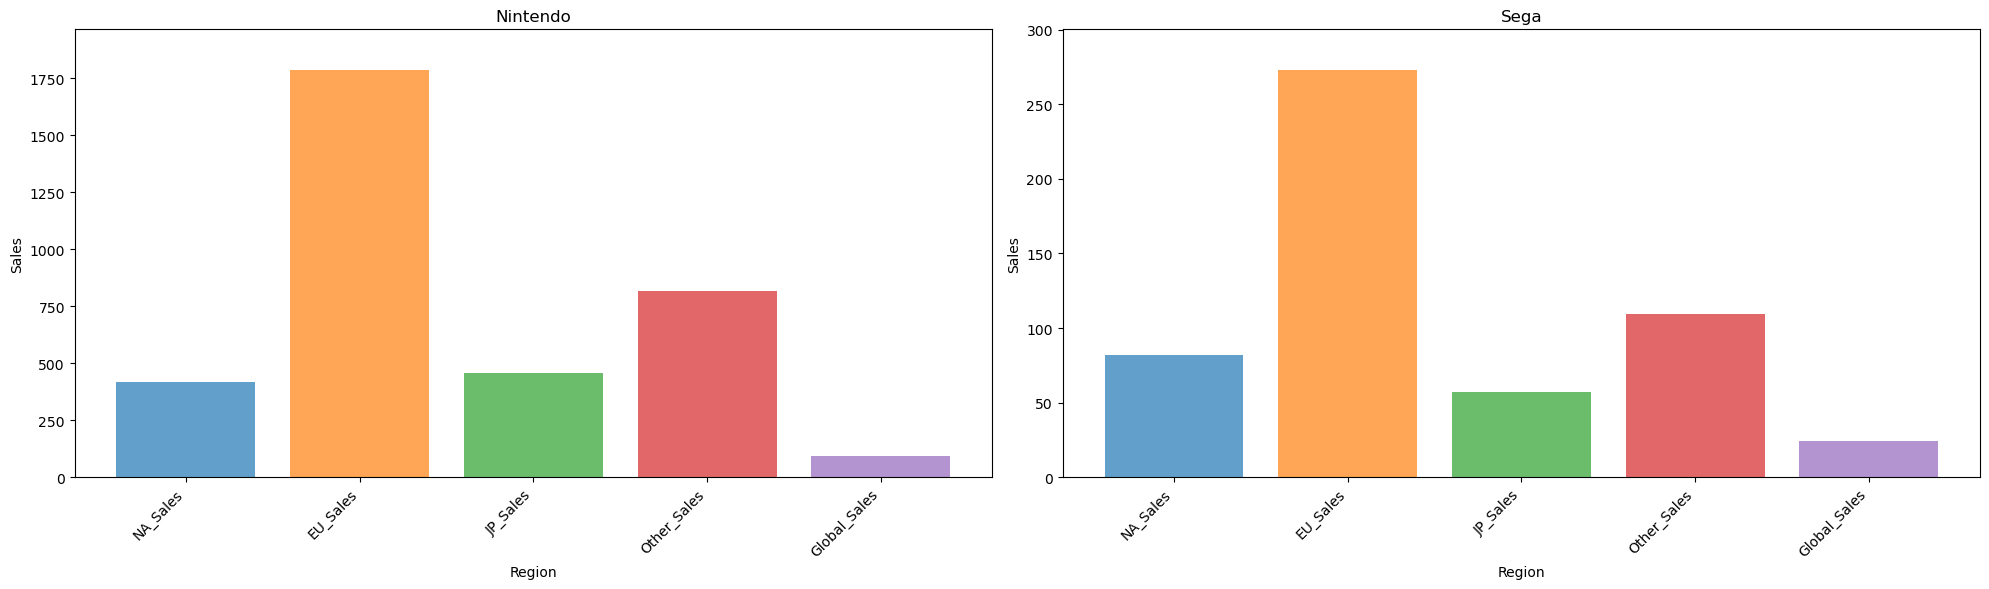

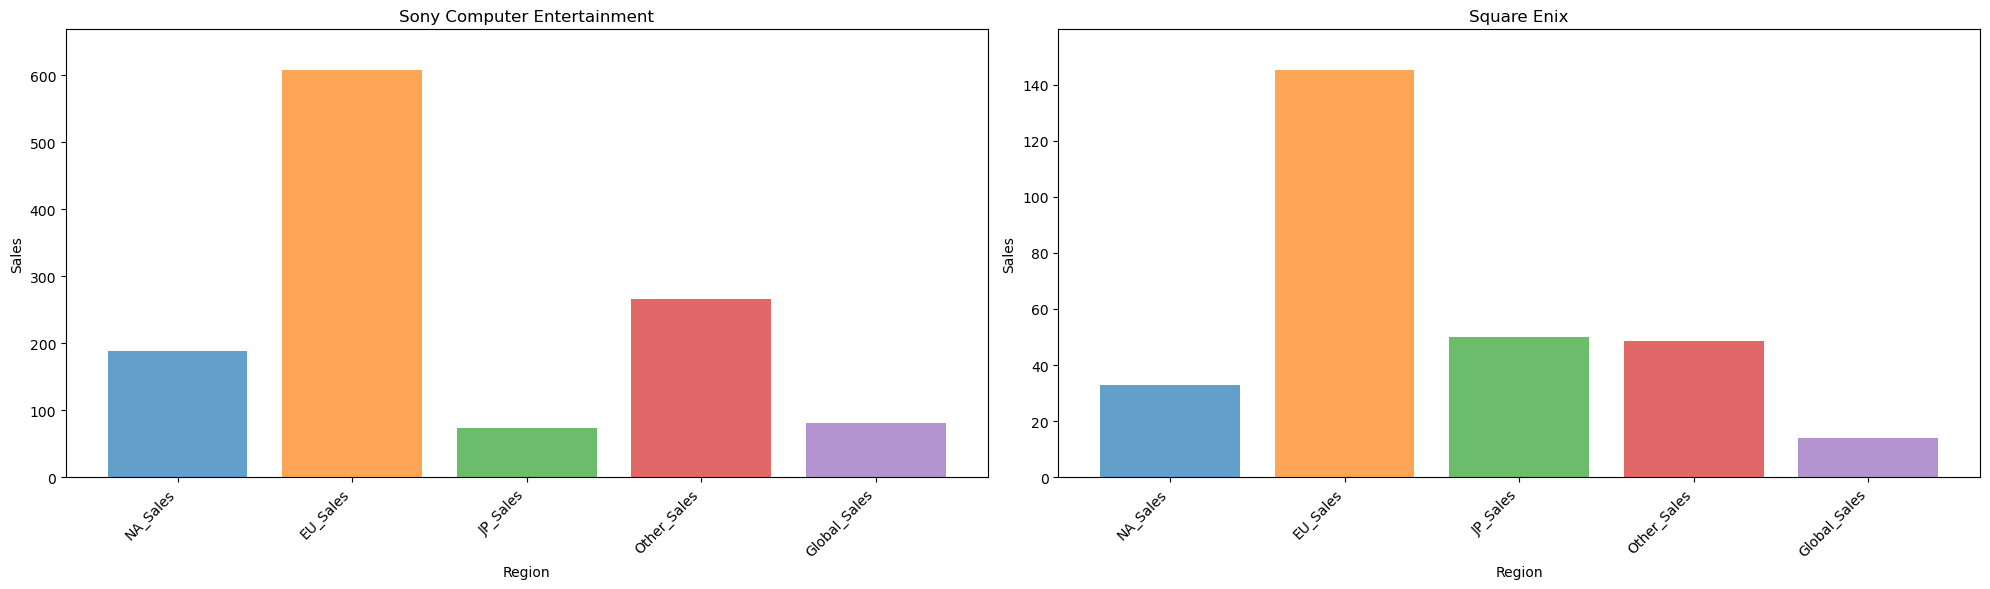

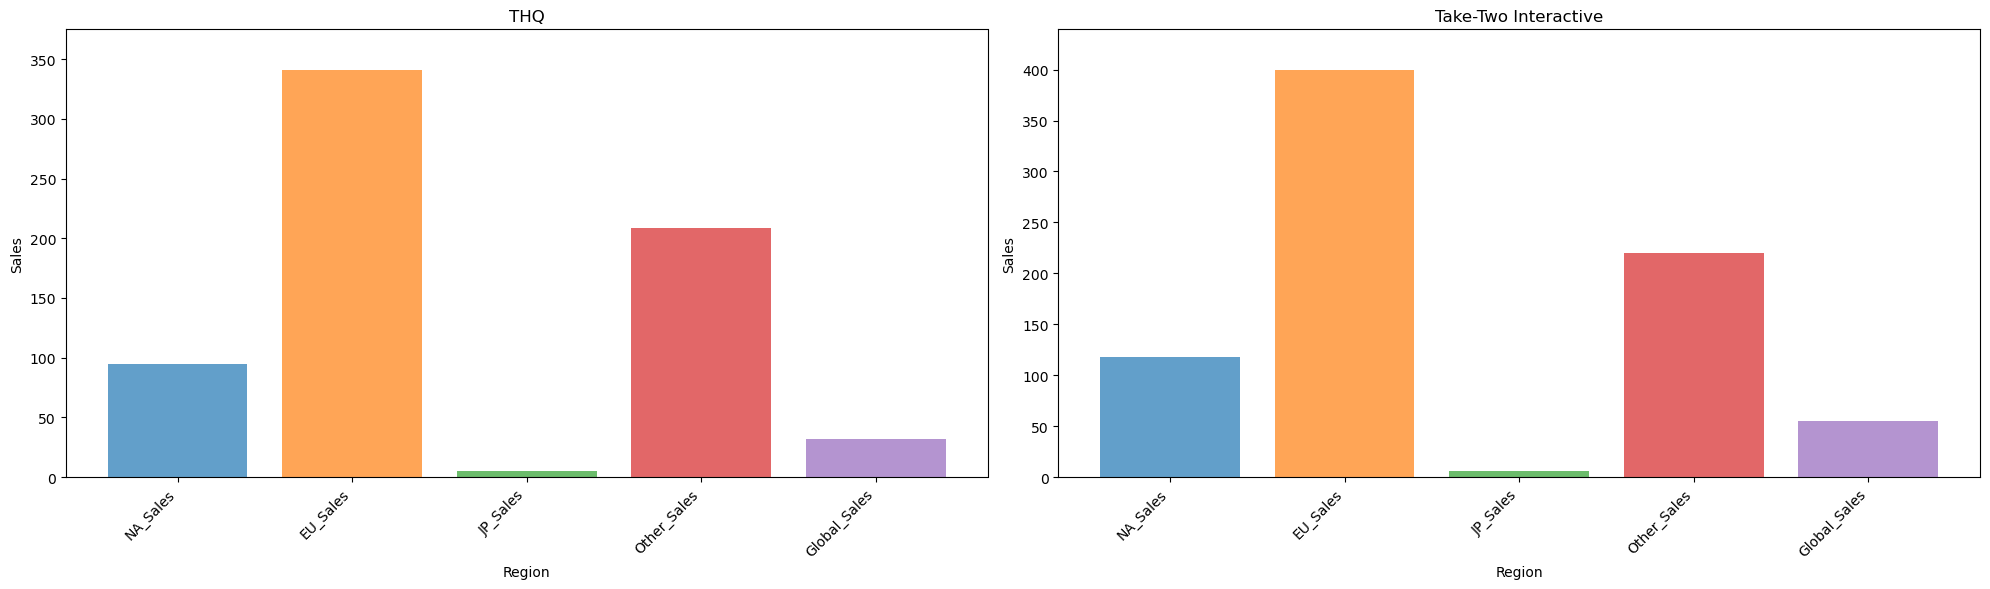

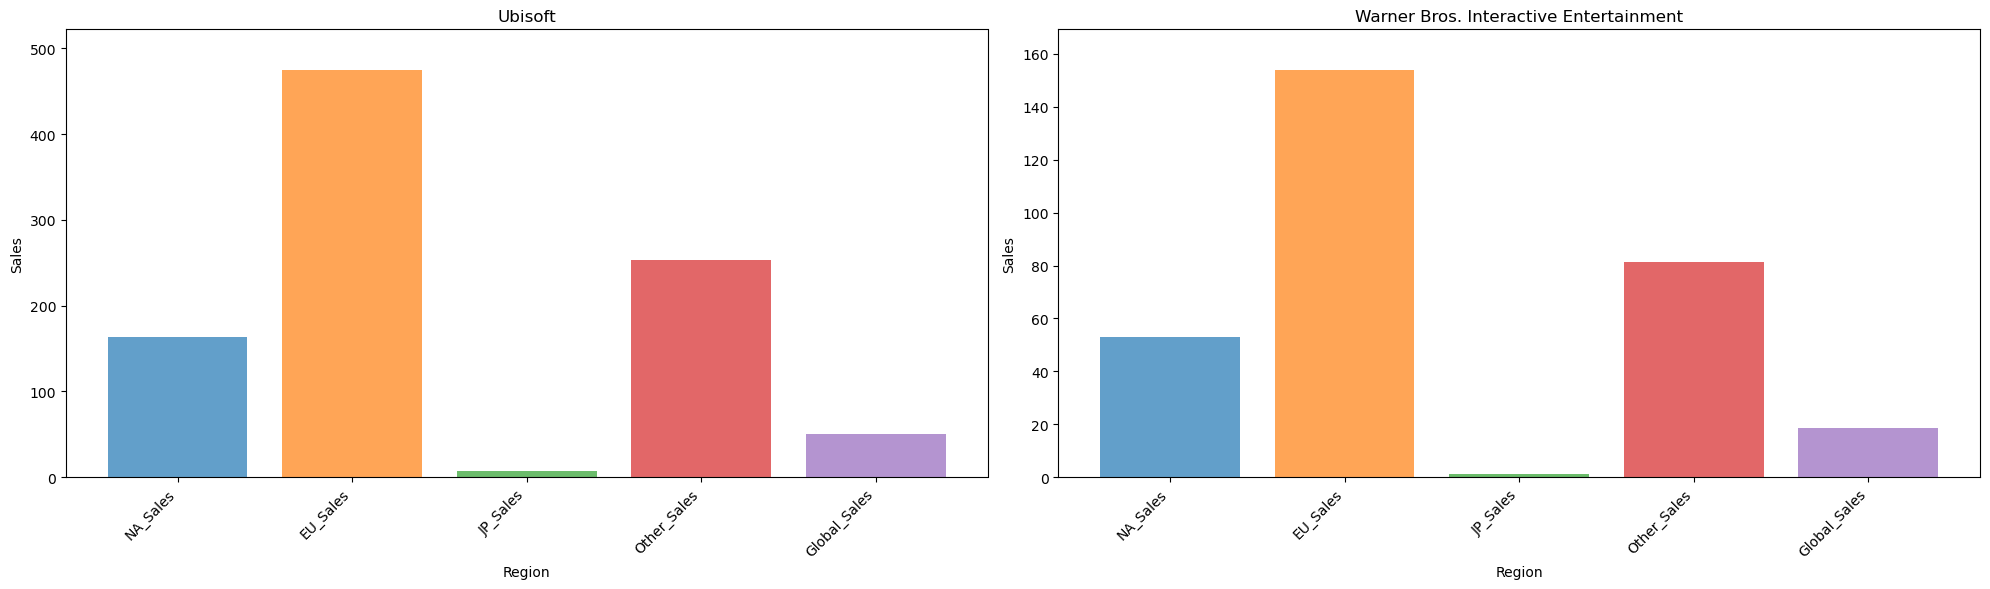

In [313]:
# Get top 20 publishers by global sales
top_20_publishers = (vg_sales_clean.groupby('Publisher')['Global_Sales']
                     .sum()
                     .nlargest(20)
                     .index)

publishers = sorted(top_20_publishers)
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i in range(0, len(publishers), 2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    for j, ax in enumerate(axes):
        if i + j >= len(publishers):
            fig.delaxes(ax)
            continue
        
        publisher = publishers[i + j]
        pub_data = vg_sales_clean[vg_sales_clean['Publisher'] == publisher].melt(
            value_vars=region_cols,
            var_name='region',
            value_name='sales'
        ).groupby('region')['sales'].sum().reset_index()

        upper_limit = pub_data['sales'].max() * 1.1

        ax.bar(pub_data['region'], pub_data['sales'], alpha=0.7, color=plt.cm.tab10.colors[:len(region_cols)])
        ax.set_ylim(0, upper_limit)
        ax.set_xticks(range(len(region_cols)))
        ax.set_xticklabels(region_cols, rotation=45, ha='right')
        ax.set_title(publisher)
        ax.set_xlabel('Region')
        ax.set_ylabel('Sales')

    plt.tight_layout()
    plt.show()

### Key Takeaway

**Nintendo** leads all publishers by a significant margin with **1,786.56 million** in global sales, 
nearly double second place **Electronic Arts** at **1,110.32 million**.

North America is the dominant market for most publishers, with EA, Activision, and Microsoft Game Studios 
generating the vast majority of their sales there while seeing minimal returns in Japan.

The exception to this trend are Japanese publishers like **Namco Bandai** and **Square Enix**, whose Japan 
sales rival or exceed their North American numbers — consistent with the genre finding that Japan has a 
strong preference for RPGs which these publishers specialize in.

## Conclusion

This analysis set out to answer four key questions about video game sales across regions, 
platforms, genres, and publishers. 

**North America** is the dominant market, accounting for nearly half of all global sales at **49.4%**, 
making it the most critical region for publishers and developers to target.

The **PS2** leads all platforms with **1,255.64 million** in global sales, followed by the **X360** 
and **PS3**. North America favors Xbox and PlayStation platforms while Japan shows stronger preference 
for Nintendo and Sony handheld platforms like the **DS** and **PSP**.

Genre preferences differ significantly by region. **Action** and **Sports** dominate globally, 
however Japan stands out with a strong preference for **Role-Playing** games — a trend reflected 
in the publisher data where Japanese publishers like **Namco Bandai** and **Square Enix** 
outperform in Japan compared to other regions.

**Nintendo** is the clear leader in publishing with **1,786.56 million** in global sales, 
with most Western publishers heavily reliant on the North American market for the majority of their revenue.

Overall, the data highlights that regional preferences play a significant role in video game sales 
and a one-size-fits-all strategy is unlikely to maximize performance across all markets.